# Scaling Extents

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def plot_extent(extent, ax=None, **kwargs):
    min_x, min_y, max_x, max_y = extent
    x = [min_x, min_x, max_x, max_x, min_x]
    y = [min_y, max_y, max_y, min_y, min_y]
    
    if ax is None:
        plt.plot(x, y, **kwargs)
    else:
        ax.plot(x, y, **kwargs)

In [4]:
def scale_extent(extent, w, h, boundary_type='outer'):
    x0, y0, x1, y1 = extent
    W, H = (x1 - x0), (y1 - y0)
    
    if ((W / H) < (w / h) and boundary_type == 'inner') or \
       ((W / H) > (w / h) and boundary_type == 'outer'):
        cy = (y0 + y1) * 0.5
        factor = 0.5 * ((W * h) / w)
        return [x0, cy - factor, x1, cy + factor]
    else:
        cx = (x0 + x1) * 0.5
        factor = 0.5 * ((H * w) / h)
        return [cx - factor, y0, cx + factor, y1]

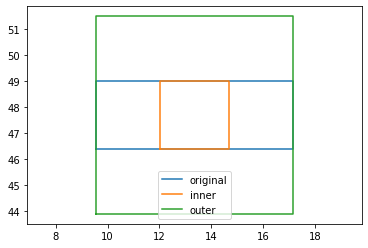

In [5]:
EXTENT = [9.5307, 46.3723, 17.1608, 49.0205]  # Austria
#EXTENT = [5.87, 47.27,15.04,55.1]  # Germany
width, height = 1280, 1280

plot_extent(EXTENT, label='original')
plot_extent(scale_extent(EXTENT, width, height, 'inner'), label='inner')
plot_extent(scale_extent(EXTENT, width, height, 'outer'), label='outer')
plt.legend()
plt.axis("equal");

In [6]:
def relative_extent(src_extent, dst_extent, size):
    w, h = size
    xa0, ya0, xa1, ya1 = src_extent
    xb0, yb0, xb1, yb1 = dst_extent
    dpx = (xa1 - xa0) / w
    dpy = (ya1 - ya0) / h
    
    #rel_extent = [
    #    int((xb0 - xa0) / dpx),
    #    int((yb1 - ya0) / dpy),
    #    int((xb1 - xa0) / dpx),
    #    int((yb0 - ya0) / dpy)
    #]
    
    rel_extent = [
        int((xb0 - xa0) / dpx),
        int((yb0 - ya0) / dpy),
        int((xb1 - xa0) / dpx),
        int((yb1 - ya0) / dpy)
    ]
    
    rel_size = (
        rel_extent[2] - rel_extent[0],
        rel_extent[1] - rel_extent[3]
    )
    return rel_extent, rel_size

In [7]:
outer_extent = [1064207.6528142476, 5829126.7295514755, 1904181.734118652, 6301612.150285203]
custom_extent = [1419323.507614238, 6017483.680748347, 2101711.986177005, 6665635.539174074]
size = (1280, 720)

rel_extent, rel_size = relative_extent(outer_extent, custom_extent, size)
rel_extent, rel_size

([541, 287, 1581, 1274], (1040, -987))

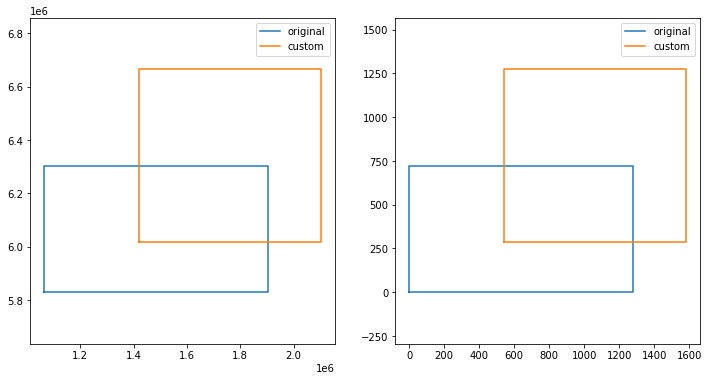

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plot_extent(outer_extent, ax=ax1, label='original')
plot_extent(custom_extent, ax=ax1, label='custom')

plot_extent([0, 0, size[0], size[1]], ax=ax2, label='original')
plot_extent(rel_extent, ax=ax2, label='custom')

ax1.legend()
ax1.axis("equal")
ax2.legend()
ax2.axis("equal");

In [9]:
FULL_EXTENT = [
    -20037508.342789244, -20037508.342789244, 
     20037508.342789244,  20037508.342789244
]

EXTENT = [
    1064207.6528142476, 5829126.7295514755, 
    1904181.734118652, 6301612.150285203
]

size = (256*2**8, 256*2**8)

rel_extent, rel_size = relative_extent(FULL_EXTENT, EXTENT, size)
rel_extent, rel_size

([34508, 42300, 35881, 43073], (1373, -773))

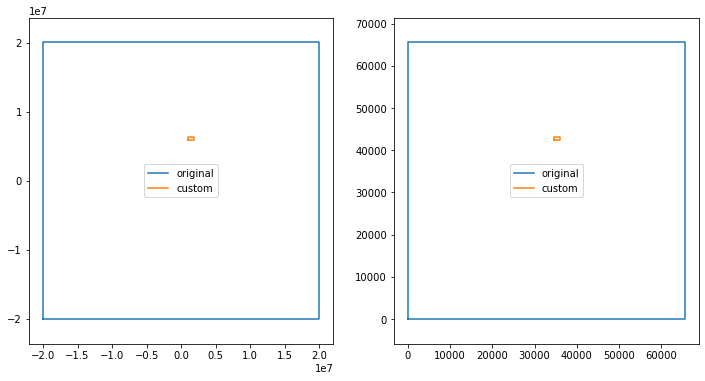

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plot_extent(FULL_EXTENT, ax=ax1, label='original')
plot_extent(EXTENT, ax=ax1, label='custom')

plot_extent([0, 0, size[0], size[1]], ax=ax2, label='original')
plot_extent(rel_extent, ax=ax2, label='custom')

ax1.legend()
ax1.axis("equal")
ax2.legend()
ax2.axis("equal");

# Mercantile Bounds

In [11]:
import mercantile

In [12]:
FULL_EXTENT = list(mercantile.xy_bounds(
     mercantile.Tile(0, 0, 0)))
FULL_EXTENT

[-20037508.342789244,
 -20037508.342789244,
 20037508.342789244,
 20037508.342789244]

In [13]:
np.concatenate([
    mercantile.lnglat(FULL_EXTENT[0], FULL_EXTENT[1]),
    mercantile.lnglat(FULL_EXTENT[2], FULL_EXTENT[3])
])

array([-180.        ,  -85.05112878,  180.        ,   85.05112878])

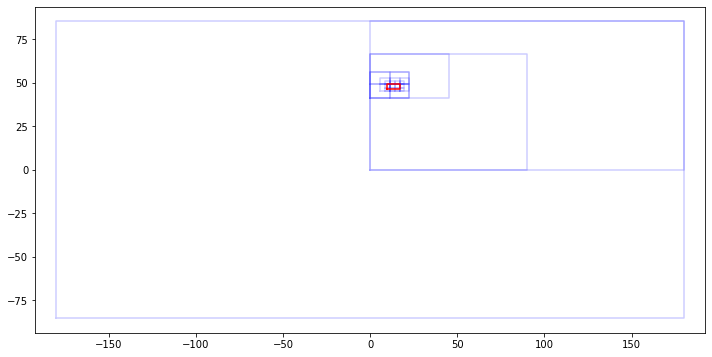

In [14]:
EXTENT = [9.5307,46.3723,17.1608,49.0205]

fig, ax = plt.subplots(figsize=(12, 6))

for tile in mercantile.tiles(*EXTENT, range(8)):
    tile_extent = list(mercantile.bounds(tile))
    
    plot_extent(tile_extent, ax=ax, label='tiles', 
                color='b', alpha=0.2)

plot_extent(EXTENT, ax=ax, label='original', color='r')
    
ax.axis("equal");

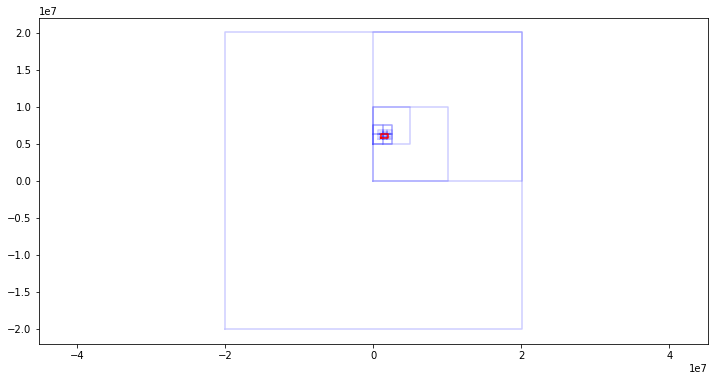

In [15]:
EXTENT = [9.5307,46.3723,17.1608,49.0205]
EXTENT_XY = np.concatenate([
    mercantile.xy(EXTENT[0], EXTENT[1]),
    mercantile.xy(EXTENT[2], EXTENT[3])
])

fig, ax = plt.subplots(figsize=(12, 6))

for tile in mercantile.tiles(*EXTENT, range(8)):
    tile_extent = list(mercantile.xy_bounds(tile))
    
    plot_extent(tile_extent, ax=ax, label='tiles', 
                color='b', alpha=0.2)

plot_extent(EXTENT_XY, ax=ax, label='original', color='r')

ax.axis("equal");